<a href="https://colab.research.google.com/github/MayerT1/DEVELOP_Bhutan_AG_I/blob/main/Final_BhutanRiceMapping_Stat_Eval_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello Welcome Team
This is a COLAB to learn more see these links [Video 1](https://www.youtube.com/watch?v=inN8seMm7UI&feature=youtu.be) | [Video 2](https://www.youtube.com/watch?v=i-HnvsehuSw) | [Example Colab](https://colab.research.google.com/notebooks/intro.ipynb)

In short we are using a Virtual Machine (VM) with Python to look at your data in more detail

# Setup

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
#create a symbolic link for pointing to /content/mnt/My Drive/Colab Notebooks
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path) 

MessageError: ignored

In [ ]:
%cd /content/notebooks/
!ls

/content/mnt/My Drive/Colab Notebooks
 abc.png					 DOA_Validation_Pts.csv
 CART_testing_results.csv			 RF_testing_results.csv
 CART_training_results.csv			 RF_training_results.csv
'Copy of htmlcss.ipynb'				 stat_dict_output_df.csv
'Copy of NASA_DEVELOP_Stat_Eval_Process.ipynb'


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import brier_score_loss
from google.colab import files

import seaborn as sns
sns.set_theme(style="white")

import pandas as pd
import numpy as np
#from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [ ]:
validation = pd.read_csv('DOA_Validation_Pts.csv')
RF_training_data = pd.read_csv('RF_training_results.csv')
RF_testing_data = pd.read_csv('RF_testing_results.csv')
CART_training_data = pd.read_csv('CART_training_results.csv')
CART_testing_data = pd.read_csv('CART_testing_results.csv')


location = validation['.geo']
actual = validation['presence']
RF_training =RF_training_data['classification']
RF_testing =RF_testing_data['classification']
CART_training =CART_training_data['classification']
CART_testing =CART_testing_data['classification']
combined_data = pd.concat([location, actual,RF_training,RF_testing,CART_training,CART_testing], axis=1)
display(combined_data)

#Class names for binary analysis
class_names = ["Rice","Not Rice"]

,.geo,presence,classification,classification,classification,classification
0,"{""type"":""Point"",""coordinates"":[89.085481531110...",0,0,0,0,0
1,"{""type"":""Point"",""coordinates"":[89.043088857395...",0,0,0,0,0
2,"{""type"":""Point"",""coordinates"":[89.064920616153...",0,0,0,0,0
3,"{""type"":""Point"",""coordinates"":[89.063377767188...",0,0,0,1,0
4,"{""type"":""Point"",""coordinates"":[88.995969536563...",0,0,0,0,0
...,...,...,...,...,...,...
287,"{""type"":""Point"",""coordinates"":[89.887651515120...",1,1,1,1,1
288,"{""type"":""Point"",""coordinates"":[89.971402351105...",1,1,1,1,1
289,"{""type"":""Point"",""coordinates"":[90.814003004367...",1,1,1,1,1
290,"{""type"":""Point"",""coordinates"":[90.72004528607,...",1,1,1,1,1


Lets look at the data graphically

ValueError: ignored

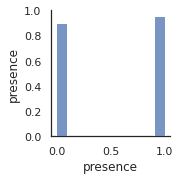

In [ ]:
sns.pairplot(validation)
sns.pairplot(combined_data)

# Data Flipping

In [ ]:
##Flips the data through transpose and flip to rearrange the confusion matrix values:(tp, tn, fp, fn) so that it can be emplyed by the the ploting code block below

RF_training_results = confusion_matrix(actual,RF_training)
print("RF_training_results",RF_training_results)

RF_transposed_training = RF_training_results.transpose()
print("RF_transposed_training_results", RF_transposed_training)

RF_final_training_results = np.flip(RF_transposed_training)
print("RF_final_training_results", RF_final_training_results)

RF_testing_results = confusion_matrix(actual,RF_testing)
print("RF_testing_results",RF_testing_results)

RF_transposed_testing = RF_testing_results.transpose()
print("RF_transposed_testing_results", RF_transposed_testing)

RF_final_testing_results = np.flip(RF_transposed_testing)
print("RF_final_testing_results", RF_final_testing_results)

#CART

CART_training_results = confusion_matrix(actual,CART_training)
print("CART_training_results",CART_training_results)

CART_transposed_training = CART_training_results.transpose()
print("CART_transposed_training_results", CART_transposed_training)

CART_final_training_results = np.flip(CART_transposed_training)
print("CART_final_training_results", CART_final_training_results)

CART_testing_results = confusion_matrix(actual, CART_testing)
print("CART_testing_results", CART_testing_results)

CART_transposed_testing = CART_testing_results.transpose()
print("CART_transposed_testing_results", CART_transposed_testing)

CART_final_testing_results = np.flip(CART_transposed_testing)
print("CART_final_testing_results", CART_final_testing_results)

RF_training_results [[130   7]
 [ 17 138]]
RF_transposed_training_results [[130  17]
 [  7 138]]
RF_final_training_results [[138   7]
 [ 17 130]]
RF_testing_results [[130   7]
 [  4 151]]
RF_transposed_testing_results [[130   4]
 [  7 151]]
RF_final_testing_results [[151   7]
 [  4 130]]
CART_training_results [[123  14]
 [ 36 119]]
CART_transposed_training_results [[123  36]
 [ 14 119]]
CART_final_training_results [[119  14]
 [ 36 123]]
CART_testing_results [[127  10]
 [ 13 142]]
CART_transposed_testing_results [[127  13]
 [ 10 142]]
CART_final_testing_results [[142  10]
 [ 13 127]]


# Export Stats

In [ ]:
#displays a table of indexed by stat method/algorithm
# stat_dict = {"Stat_method":  ["Accuracy Score", "precision_score", "average_precision_score", "cohen_kappa_score", "brier_score_loss", "roc_auc_score", 'f1_score' ],
#             'Random Forest':   [accuracy_score(actual,RF_training), cohen_kappa_score(actual,RF_training), f1_score(actual,RF_training)],#precision_score(actual,RF_training),average_precision_score(actual,RF_training), cohen_kappa_score(actual,RF_training), brier_score_loss(actual,RF_training), roc_auc_score(actual,RF_training), f1_score(actual,RF_training)],
#              #'RF_testing':   [accuracy_score(actual,RF_testing), cohen_kappa_score(actual,RF_testing), f1_score(actual,RF_testing)],#precision_score(actual,RF_testing),average_precision_score(actual,RF_testing), cohen_kappa_score(actual,RF_testing), brier_score_loss(actual,RF_testing), roc_auc_score(actual,RF_testing), f1_score(actual,RF_testing)],
#              'CART':   [accuracy_score(actual,CART_training), cohen_kappa_score(actual,CART_training), f1_score(actual,CART_training)]} #precision_score(actual,CART_training),average_precision_score(actual,CART_training), cohen_kappa_score(actual,CART_training), brier_score_loss(actual,CART_training), roc_auc_score(actual,CART_training), f1_score(actual,CART_training)],
#              #'CART_testing':   [accuracy_score(actual,CART_testing), precision_score(actual,CART_testing),average_precision_score(actual,CART_testing), cohen_kappa_score(actual,CART_testing), brier_score_loss(actual,CART_testing), roc_auc_score(actual,CART_testing), f1_score(actual,CART_testing)]}

stat_dict = {"Stat_method":  ["Accuracy Score",  "cohen_kappa_score", 'f1_score' ],
            'Random Forest':   [accuracy_score(actual,RF_training), cohen_kappa_score(actual,RF_training), f1_score(actual,RF_training)],
             'CART':   [accuracy_score(actual,CART_training), cohen_kappa_score(actual,CART_training), f1_score(actual,CART_training)]} 
             
stat_dict_output_df = pd.DataFrame(stat_dict)
display(stat_dict_output_df)

# In colab go to the table of contents (left panel)-> select Files (furtherst left)-> find this CSV right click and download
stat_dict_output_df.to_csv('stat_dict_output_df.csv')



print("-")
print( 'classification_report_RF_training :')
print( classification_report(actual, RF_training) )
print("-")
print( 'classification_report_RF_testing :')
print( classification_report(actual, RF_testing) )
print("-")
print( 'classification_report_CART_training :')
print( classification_report(actual, CART_training) )
print("-")
print( 'classification_report_CART_testing :')
print( classification_report(actual, CART_testing) )


,Stat_method,Random Forest,CART
0,Accuracy Score,0.917808,0.828767
1,cohen_kappa_score,0.835686,0.659404
2,f1_score,0.920000,0.826389


-
classification_report_RF_training :
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       137
           1       0.95      0.89      0.92       155

    accuracy                           0.92       292
   macro avg       0.92      0.92      0.92       292
weighted avg       0.92      0.92      0.92       292

-
classification_report_RF_testing :
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       137
           1       0.96      0.97      0.96       155

    accuracy                           0.96       292
   macro avg       0.96      0.96      0.96       292
weighted avg       0.96      0.96      0.96       292

-
classification_report_CART_training :
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       137
           1       0.89      0.77      0.83       155

    accuracy                           0.83       292
   macro avg 

# Confusion Matrix Referencing Flipped data

Confusion matrix, without normalization
[[130   7]
 [ 17 138]]
Confusion matrix, without normalization
[[130   7]
 [  4 151]]
Confusion matrix, without normalization
[[123  14]
 [ 36 119]]
Confusion matrix, without normalization
[[127  10]
 [ 13 142]]


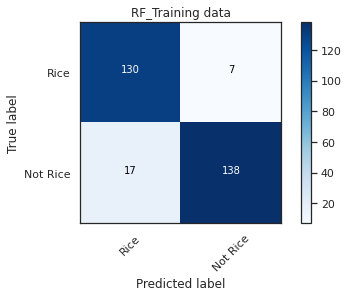

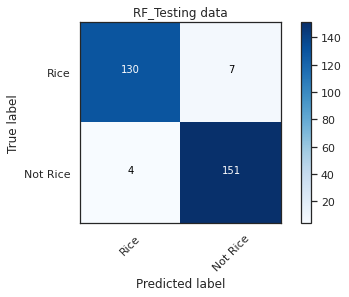

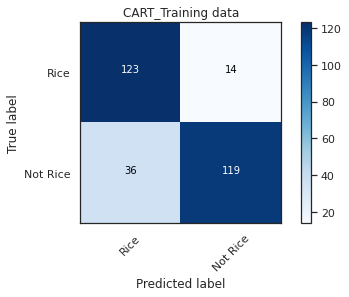

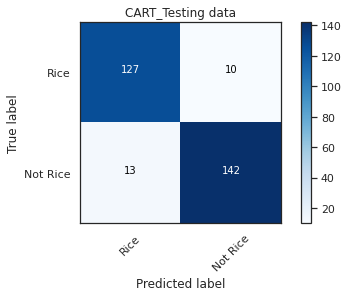

In [ ]:
#this code block produces 4 confusion matrices using plot_confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


#code should automatically save the plots as pngs or you can right click them and save as too.

#Plot_RF_training confusion matrix
plt.figure()
plot_confusion_matrix(RF_training_results, classes=class_names,
                      title= 'RF_Training data')

plt.figure()
plot_confusion_matrix(RF_testing_results, classes=class_names,
                      title= 'RF_Testing data')

#Plot_CART_training confusion matrix
plt.figure()
plot_confusion_matrix(CART_training_results, classes=class_names,
                      title= 'CART_Training data')

plt.figure()
plot_confusion_matrix(CART_testing_results, classes=class_names,
                      title= 'CART_Testing data')

#fig.savefig('training_Enter_title_here')

plt.savefig("abc.png")
plt.show()

# Additional Stats print outs

In [ ]:

print("-")
print( 'Accuracy Score_RF_training :',accuracy_score(actual,RF_training) )
print( 'Accuracy Score_RF_testing :',accuracy_score(actual,RF_testing) )

print("-")
print('precision_score_RF_training :', precision_score(actual,RF_training))
print('precision_score_RF_testing :', precision_score(actual,RF_testing))

print("-")
print('cohen_kappa_score_RF_training :',cohen_kappa_score(actual,RF_training))
print('cohen_kappa_score_RF_testing :',cohen_kappa_score(actual,RF_testing))

print("-")
print('average_precision_score_RF_training :',average_precision_score(actual,RF_training))
print('average_precision_score_RF_testing :',average_precision_score(actual,RF_testing))

print("-")
print('f1_score_RF_training :',f1_score(actual,RF_training))
print('f1_score_RF_testing :',f1_score(actual,RF_testing))

print("-")
print('fbeta_score beta=.05_RF_training :',fbeta_score(actual,RF_training, beta=0.5))
print('fbeta_score beta=.05_RF_testing :',fbeta_score(actual,RF_testing, beta=0.5))

print("-")
print('fbeta_score beta=1_RF_training :',fbeta_score(actual,RF_training, beta=1))
print('fbeta_score beta=1_RF_testing :',fbeta_score(actual,RF_testing, beta=1))

print("-")
print('fbeta_score beta=2_RF_training :',fbeta_score(actual,RF_training, beta=2))
print('fbeta_score beta=2_RF_testing :',fbeta_score(actual,RF_testing, beta=2))

print("-")
print('roc_auc_score_RF_training :',roc_auc_score(actual,RF_training))
print('roc_auc_score_RF_testing :',roc_auc_score(actual,RF_testing))


print("-")
print('brier_score_loss_RF_training :',brier_score_loss(actual,RF_training))
print('brier_score_loss_RF_testing :',brier_score_loss(actual,RF_testing))

print("-")
print( 'classification_report_RF_training :')
print( classification_report(actual,RF_training) )
print("-")
print( 'classification_report_RF_testing :')
print( classification_report(actual,RF_testing) )


print("-")
print( 'Accuracy Score_CART_training :',accuracy_score(actual,CART_training) )
print( 'Accuracy Score_CART_testing :',accuracy_score(actual,CART_testing) )

print("-")
print('precision_score_CART_training :', precision_score(actual,CART_training))
print('precision_score_CART_testing :', precision_score(actual,CART_testing))

print("-")
print('cohen_kappa_score_CART_training :',cohen_kappa_score(actual,CART_training))
print('cohen_kappa_score_CART_testing :',cohen_kappa_score(actual,CART_testing))

print("-")
print('average_precision_score_CART_training :',average_precision_score(actual,CART_training))
print('average_precision_score_CART_testing :',average_precision_score(actual,CART_testing))

print("-")
print('f1_score_CART_training :',f1_score(actual,CART_training))
print('f1_score_CART_testing :',f1_score(actual,CART_testing))

print("-")
print('fbeta_score beta=.05_CART_training :',fbeta_score(actual,CART_training, beta=0.5))
print('fbeta_score beta=.05_CART_testing :',fbeta_score(actual,CART_testing, beta=0.5))

print("-")
print('fbeta_score beta=1_CART_training :',fbeta_score(actual,CART_training, beta=1))
print('fbeta_score beta=1_CART_testing :',fbeta_score(actual,CART_testing, beta=1))

print("-")
print('fbeta_score beta=2_CART_training :',fbeta_score(actual,CART_training, beta=2))
print('fbeta_score beta=2_CART_testing :',fbeta_score(actual,CART_testing, beta=2))

print("-")
print('roc_auc_score_CART_training :',roc_auc_score(actual,CART_training))
print('roc_auc_score_CART_testing :',roc_auc_score(actual,CART_testing))


print("-")
print('brier_score_loss_CART_training :',brier_score_loss(actual,CART_training))
print('brier_score_loss_CART_testing :',brier_score_loss(actual,CART_testing))

print("-")
print( 'classification_report_CART_training :')
print( classification_report(actual,CART_training) )
print("-")
print( 'classification_report_CART_testing :')
print( classification_report(actual,CART_testing) )


-
Accuracy Score_RF_training : 0.9178082191780822
Accuracy Score_RF_testing : 0.9623287671232876
-
precision_score_RF_training : 0.9517241379310345
precision_score_RF_testing : 0.9556962025316456
-
cohen_kappa_score_RF_training : 0.835685814771395
cohen_kappa_score_RF_testing : 0.9242738589211619
-
average_precision_score_RF_training : 0.9055606686272419
average_precision_score_RF_testing : 0.9447317048613636
-
f1_score_RF_training : 0.9200000000000002
f1_score_RF_testing : 0.9648562300319489
-
fbeta_score beta=.05_RF_training : 0.9387755102040818
fbeta_score beta=.05_RF_testing : 0.9593392630241423
-
fbeta_score beta=1_RF_training : 0.9200000000000002
fbeta_score beta=1_RF_testing : 0.9648562300319489
-
fbeta_score beta=2_RF_training : 0.9019607843137257
fbeta_score beta=2_RF_testing : 0.9704370179948586
-
roc_auc_score_RF_training : 0.9196138450671061
roc_auc_score_RF_testing : 0.9615493289380739
-
brier_score_loss_RF_training : 0.0821917808219178
brier_score_loss_RF_testing : 0.0376